## Overview Exercises

### Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### 1. Has the network latency gone up since we switched internet service providers?

Ho: Network lactency has increased since switching ISP's.

Ha: Network latency has not increased since switching ISP's.
    
    
True Pos: Came to conclusion that network latency and switching ISP's are related.
    
True Neg: Came to conclusion that network latency and switching ISP's are not related.
    
Type I: Predicted that net latency is related to switching ISP's when they actually are not related
     
Type II: Predicted that net latency is not related to switching ISP's when they actually are related.


#### 2. Is the website redesign any good?

Ho: The website redesign has increased the conversion rate.

Ha: The website redesign has not increased the conversion rate.


True Pos: Came to conclusion that conversion rate and redesign are related and they are.

True Neg: Came to conclusion that conversion rate and redesign are not related and they are not.  

Type I: Predicted that the redesign is related to increase in conversion rate when they actually are not related
     
Type II: Predicted that the redesign is not related to increase in conversion rate when they actually are related.

#### 3. Is our television ad driving more sales?

Ho: Sales have increased since the television ad aired.

Ha: Sales have not increased since the televison ad aired.


True Pos: Came to conclusion that the televison ad and increase in sales are related and they are.

True Neg: Came to conclusion that the televison ad and increase in sales are not related and they are not.  

Type I: Predicted that the television ad is related to increase in sales when they actually are not related
     
Type II: Predicted that the television ad is not related to increase in sales when they actually are related.

## T-Test Exercises

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
np.random.seed(123)

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

#### - A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

#### - A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance

In [45]:
# Office 1
mean1 = 90
std1 = 15
sales1 = 40

# Office 2
mean1 = 100
std2 = 20
sales1 = 50

alpha = .05

<AxesSubplot:>

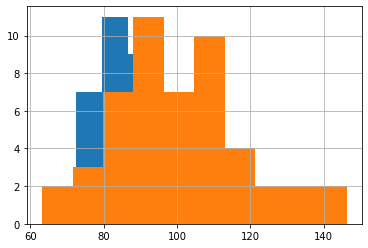

In [47]:
# Plot a histogram of both?
office1 = pd.Series(stats.norm(90,15).rvs(40))
office1.hist()

office2 = pd.Series(stats.norm(100,20).rvs(50))
office2.hist()


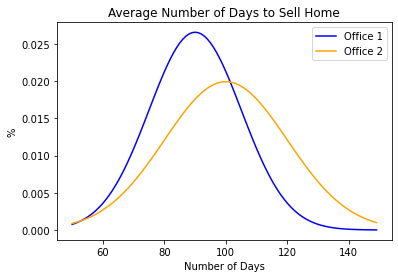

In [14]:
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, c='blue', label = 'Office 1')
plt.plot(x, y2, c='orange', label = 'Office 2')


plt.ylabel('%')
plt.xlabel('Number of Days')
plt.title('Average Number of Days to Sell Home')
plt.legend()

In [ ]:
# Hypothesis:

# H0 = There is no difference between the average sale time it takes 
# to sell homes between Office #1 and Office #2.

# Ha = There is a difference between the average sale time it takes 
# to sell homes between Office #1 and Office #2.



In [41]:
# Assumptions:

# Normal Dist?
# Independent?
# Variance? 
var1 = std1 ** .5
var2 = std2 ** .5

var1 == var2

False

In [48]:
# T-Test
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)
t,p


(-2.7091418459143854, 0.00811206270346016)

In [71]:
#Reject of fail to reject

if p < alpha:
    print('Reject H0!')
else:
    print('Fail to reject H0!')

Reject H0!


### Cars Cars Cars!!! 

In [2]:
from pydataset import data
mpg = data('mpg')

In [3]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [80]:
# Avg of Cty and Hwy = avg_mpg
mpg['avg_mpg'] = (mpg['cty'] + mpg['hwy'])/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mph,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [81]:
# Specify cars from 2008 and 1999
cars_2008 = mpg[mpg.year == 2008].avg_mpg
cars_1999 = mpg[mpg.year == 1999].avg_mpg

<AxesSubplot:>

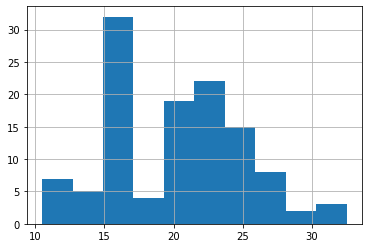

In [82]:
#Hist
cars_2008.hist()

<AxesSubplot:>

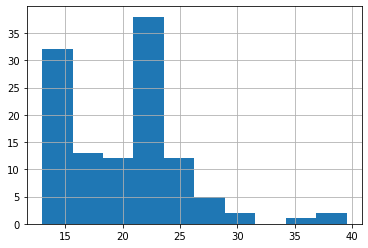

In [83]:
#Hist
cars_1999.hist()

In [ ]:
# Set Hypothesis:

# H0: Average MPG for 2008 cars = average mpg for 1999 cars.
# Ha: Average Mpg for 2008 cars > average mpg for 1999 cars.

In [86]:
# How big is the sample size? >30?
cars_2008.count(), cars_1999.count()

(117, 117)

In [85]:
# Variance? Yep.
cars_2008.var(), cars_1999.var()

(24.097480106100797, 27.122605363984682)

In [89]:
alpha = .05

t, p = stats.ttest_ind(cars_2008, cars_1999, equal_var=False)

t, p/2, alpha

(-0.21960177245940962, 0.4131875386030319, 0.05)

In [90]:
print('is p/2 < alpha?', p/2 < alpha)
print('is t>0?', t>0)

is p/2 < alpha? False
is t>0? False


In [91]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
